In [1]:
import sys
sys.path.append("../src")  # Add src to the Python path


In [2]:
from data_loader import load_data

In [3]:
train_df, test_df, valid_df = load_data("../data/liar_dataset")

In [4]:
valid_df.head()

,id,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [5]:
selected_columns = ["label", "statement", "context", "subject"]
train_df = train_df[selected_columns]
train_df.dropna()

,label,statement,context,subject
0,false,Says the Annies List political group supports ...,a mailer,abortion
1,half-true,When did the decline of coal start? It started...,a floor speech.,"energy,history,job-accomplishments"
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Denver,foreign-policy
3,false,Health care reform legislation is likely to ma...,a news release,health-care
4,half-true,The economic turnaround started at the end of ...,an interview on CNN,"economy,jobs"
...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"interview on ""The Colbert Report""","animals,elections"
10236,mostly-true,Democrats have now become the party of the [At...,an interview,elections
10237,half-true,Says an alternative to Social Security that op...,a Republican presidential debate,"retirement,social-security"
10238,false,On lifting the U.S. Cuban embargo and allowing...,a televised debate on Miami's WPLG-10 against ...,"florida,foreign-policy"


In [6]:
# Define mapping: True (1), False (0)
label_mapping = {
    "true": 1,
    "mostly-true": 1,
    "half-true": 0,
    "barely-true": 0,
    "false": 0,
    "pants-fire": 0
}

# Apply the mapping to the label column
train_df["class"] = train_df["label"].map(label_mapping)
train_df.head()


,label,statement,context,subject,class
0,false,Says the Annies List political group supports ...,a mailer,abortion,0
1,half-true,When did the decline of coal start? It started...,a floor speech.,"energy,history,job-accomplishments",0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Denver,foreign-policy,1
3,false,Health care reform legislation is likely to ma...,a news release,health-care,0
4,half-true,The economic turnaround started at the end of ...,an interview on CNN,"economy,jobs",0


In [7]:
from fake_news import load_fakenews_dataset
df = load_fakenews_dataset()


In [8]:
df.head()

,id,news_url,title,tweet_ids,source,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,gossipcop,fake
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,gossipcop,fake
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,gossipcop,fake
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,gossipcop,fake
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,gossipcop,fake


In [9]:
df.shape

(23196, 6)

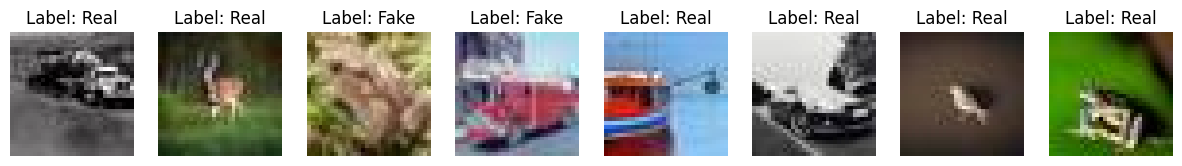

In [10]:
import sys
sys.path.append("../src")

from cifake_loader import load_cifake, show_cifake_images

# Load dataset
train_loader, test_loader = load_cifake(data_path="../data/cifake_images_dataset", batch_size=64)

# Show sample images
data = show_cifake_images(data_path="../data/cifake_images_dataset", num_images=8)


In [11]:
import os
# Count the number of images in each folder
num_real = len(os.listdir("../data/cifake_images_dataset/train/REAL"))
num_fake = len(os.listdir("../data/cifake_images_dataset/train/FAKE"))

# Total images
total_images = num_real + num_fake
total_images

100000

In [18]:
from deepfake_loader import load_deepfake_dataset

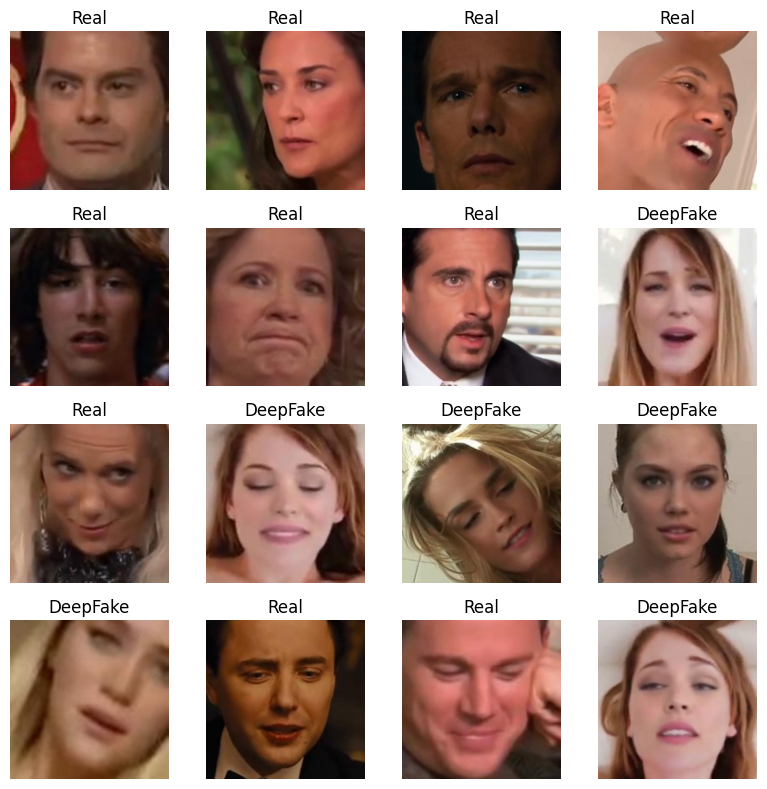

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.ToTensor()        
])

# Load dataset
dataset_path = "../data/deepfake_detection_dataset"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
batch_size = 16
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Class names
class_names = dataset.classes  # ['real', 'deepfake']

# Function to visualize images
def imshow(imgs, labels):
    imgs = imgs.numpy().transpose((1, 2, 0))
    plt.imshow(imgs)
    plt.title(class_names[labels])
    plt.axis("off")
    plt.show()

# Get a batch of images
images, labels = next(iter(dataloader))

# Display some images
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()
for img, label, ax in zip(images, labels, axes):
    img = img.numpy().transpose((1, 2, 0))
    ax.imshow(img)
    ax.set_title(class_names[label])
    ax.axis("off")

plt.tight_layout()
plt.show()


In [29]:
fake = len(os.listdir("../data/deepfake_detection_dataset/Real"))
fake

4259

In [30]:
real = len(os.listdir("../data/deepfake_detection_dataset/DeepFake"))
real

2845